<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Visualizing Errors](04.03-Errorbars.ipynb) | [Contents](Index.ipynb) | [Histograms, Binnings, and Density](04.05-Histograms-and-Binnings.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.04-Density-and-Contour-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 密度圖和等高線圖

在二維空間中顯示三維資料是非常有用的。
``plt.contour``建立等高線圖，``plt.contourf``建立填色的等高線圖,``plt.imshow``用來顯示影像。


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## 三維函數的視覺化

使用函數$z = f(x, y)$展示等高線圖:

In [3]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

等高線圖可以被使用``plt.contour``函式來建立。它使用3個參數:格線的*x*值，格線的*y*值，和格線的*z*值。*x*和*y*值表示繪圖的位置，而*z*值則會被用來當作是等高層使用。
使用``np.meshgrid``函式，可將資料從一維的陣列建立一個二維的網格:

In [6]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

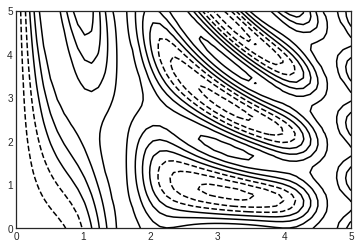

In [8]:
# 標準線條的等高線圖
plt.contour(X, Y, Z, colors='black');

在預設的情況下，當使用一個顏色，負值會被以虛線來表示，而正值則是以實線來表示。
另一方面，可以透過``cmap``參數指定一個色彩對應表來對線條進行色彩編碼，就可畫出更多線條。


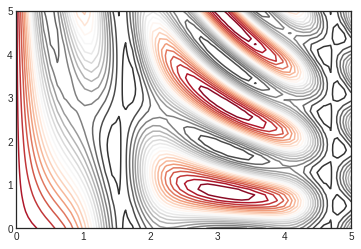

In [11]:
plt.contour(X, Y, Z, 20, cmap='RdGy');
# Determines the number and positions of the contour lines / regions.

選用``RdGy``(*紅色灰階*的簡寫)色彩對應表，在置中的資料是不錯的選擇。
```
但線條間的空間可能有一些分散，可以改成``plt.contourf()``實心等高線圖函式來改變這個情況，它和``plt.contour()``的語法大致相同。

此外還要加上``plt.colorbar()``命令，它可以自動建立額外具有顏色資訊標籤的軸:

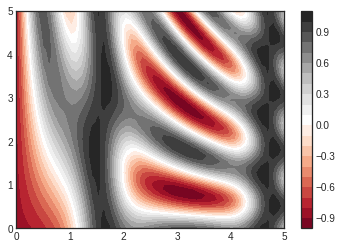

In [12]:
# 可清楚看到波峰和波谷
plt.contourf(X, Y, Z, 20, cmap='RdGy') # contourf: filled contours
plt.colorbar();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  """


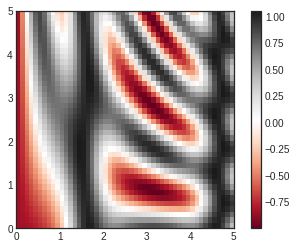

In [16]:
# 用plt.imshow()函式，它把資料的二維格點當做是一個影像
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

然而使用``imshow()``有一些潛在的陷阱:

- ``plt.imshow()``不接受*x*和*y*格點，因此必須要手動的指定在圖表上的影像*範圍* [*xmin*, *xmax*, *ymin*, *ymax*]。
- ``plt.imshow()``預設是遵循標準的影像陣列定義，其原點是在左上角，而不是像一般等高線圖的左下角。當你使用格點資料時，必須要進行轉換。
- ``plt.imshow()``將會自動的調整軸的外觀比例以符合輸入的資料，可以透過設定改變，例如:``plt.axis(aspect='image')``讓*x*和*y*的單位相符合。

使用部分透明的背景影像(使用``alpha``參數來設定透明度)以及疊畫上等高線圖加上等高線自己的標籤(使用``plt.clabel()``函式):

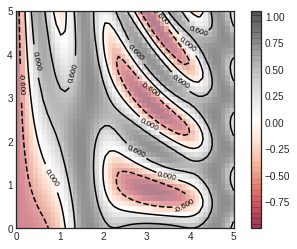

In [19]:
# 合併等高線圖和影像圖
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

<!--NAVIGATION-->
< [Visualizing Errors](04.03-Errorbars.ipynb) | [Contents](Index.ipynb) | [Histograms, Binnings, and Density](04.05-Histograms-and-Binnings.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.04-Density-and-Contour-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
